<a href="https://colab.research.google.com/github/saifulislamsarfaraz/Statistics-for-Data-Science/blob/main/cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import matplotlib.pyplot as plt
import matplotlib.style as stl
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
read_path = "/content/drive/MyDrive/Colab Notebooks/Coin/coin_Ethereum.csv"

In [ ]:
data = pd.read_csv(read_path)
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [ ]:
data.shape

(2160, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [ ]:
data.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
import datetime as dt
data["Date"]=pd.to_datetime(data["Date"])
data['Date_year'] =data["Date"].dt.year
data['Date_month'] =data["Date"].dt.month
data['Date_day'] =data["Date"].dt.day
data['Date_hour'] =data["Date"].dt.hour
data['Date_minute'] =data["Date"].dt.minute
data['Date_seconde'] =data["Date"].dt.second
data.drop(["Date"], axis=1, inplace=True)

In [ ]:
numeric=['High', 'Low', 'Open','Close','Volume', 'Marketcap', 'Date_year','Date_month','Date_day', 'Date_minute','Date_seconde']
category=['Name','Symbol']

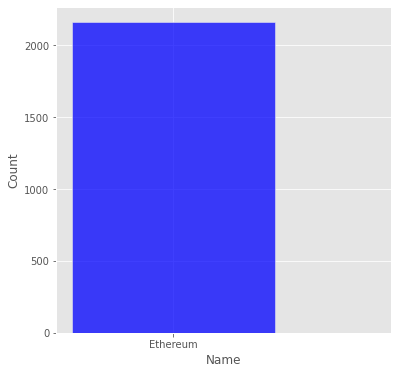

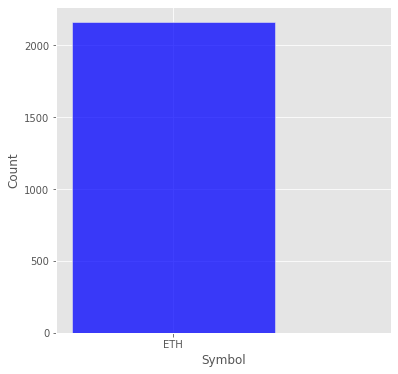

In [ ]:
stl.use('ggplot')

for col in category:
    plt.figure(figsize=(6,6))
    sns.histplot(data[col], color="blue")
    plt.show

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07,2015,8,8,23,59,59
1,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07,2015,8,9,23,59,59
2,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07,2015,8,10,23,59,59
3,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07,2015,8,11,23,59,59
4,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07,2015,8,12,23,59,59


In [ ]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['Name','Symbol'])
encdata=ordenc.fit_transform(data)
encdata.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,1,1,1,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07,2015,8,8,23,59,59
1,2,1,1,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07,2015,8,9,23,59,59
2,3,1,1,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07,2015,8,10,23,59,59
3,4,1,1,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07,2015,8,11,23,59,59
4,5,1,1,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07,2015,8,12,23,59,59


In [ ]:
def outlier(col):
    color = random.choice(['Blue', 'Green', 'Black'])
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

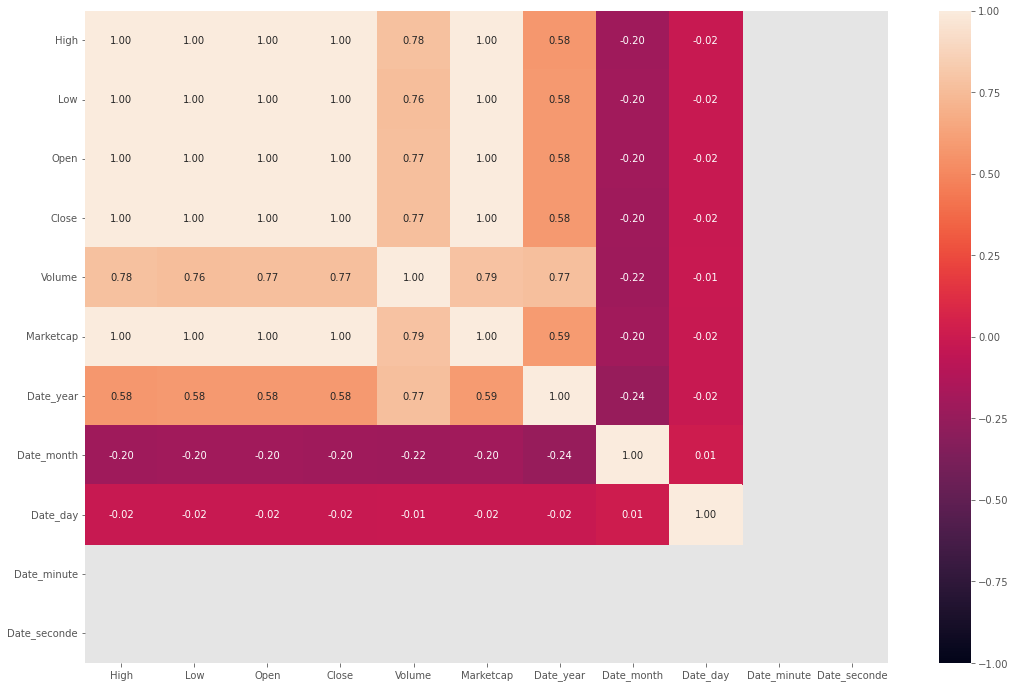

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(data[numeric].corr(), annot=True, annot_kws={"fontsize":10}, fmt=".2f", vmin=-1)
plt.show()

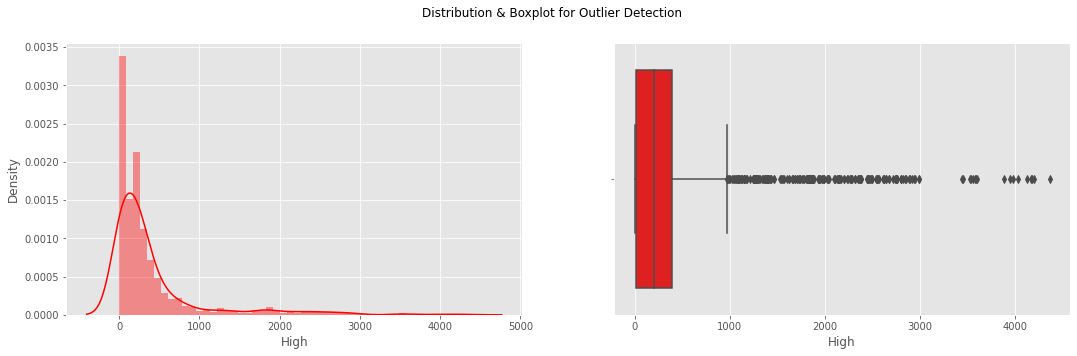

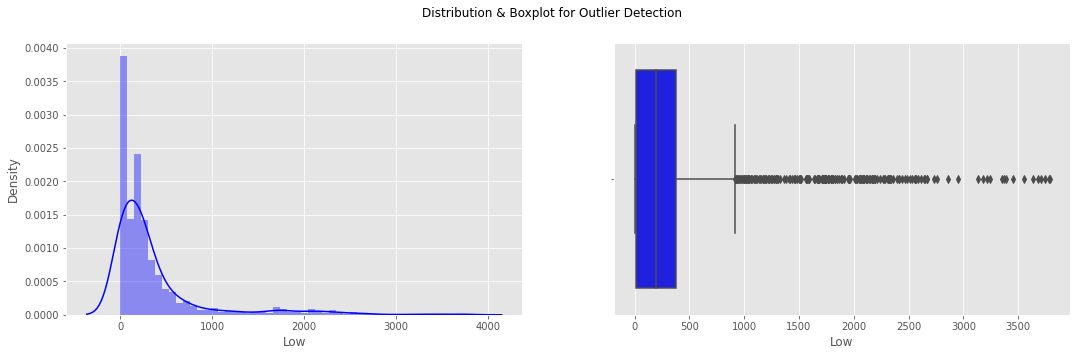

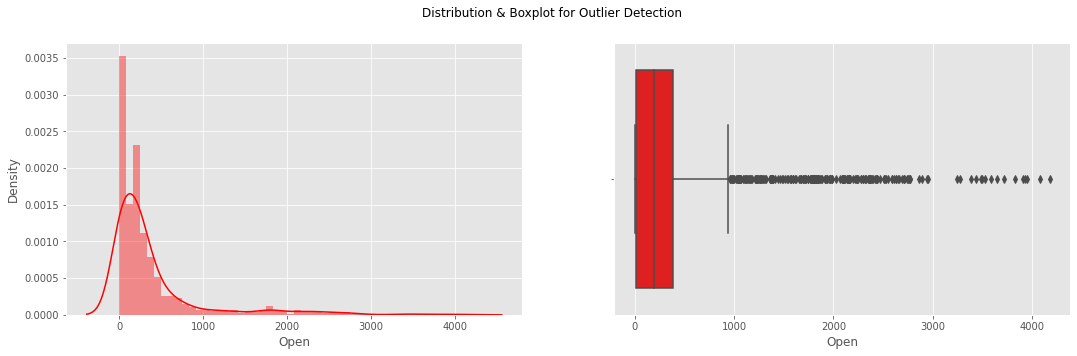

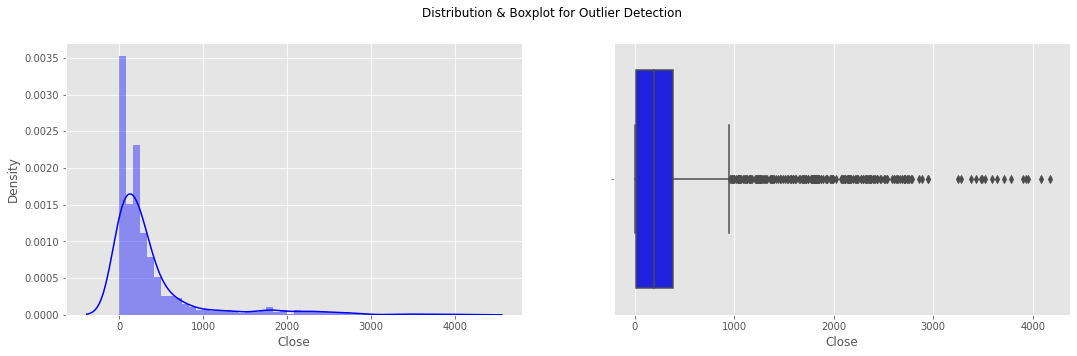

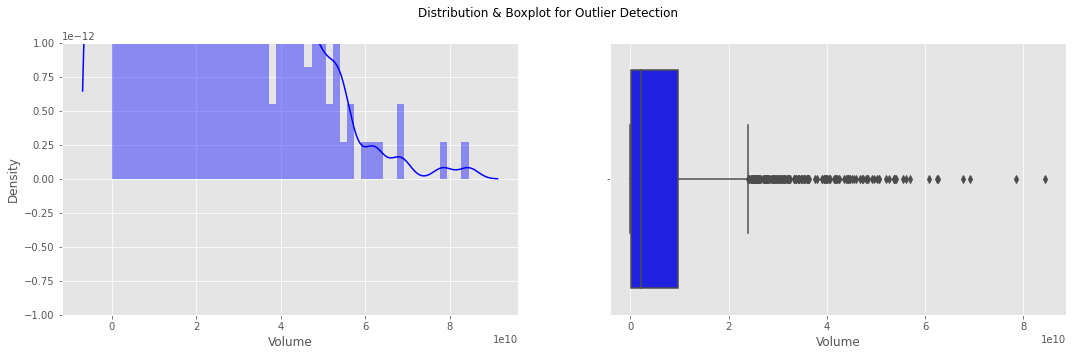

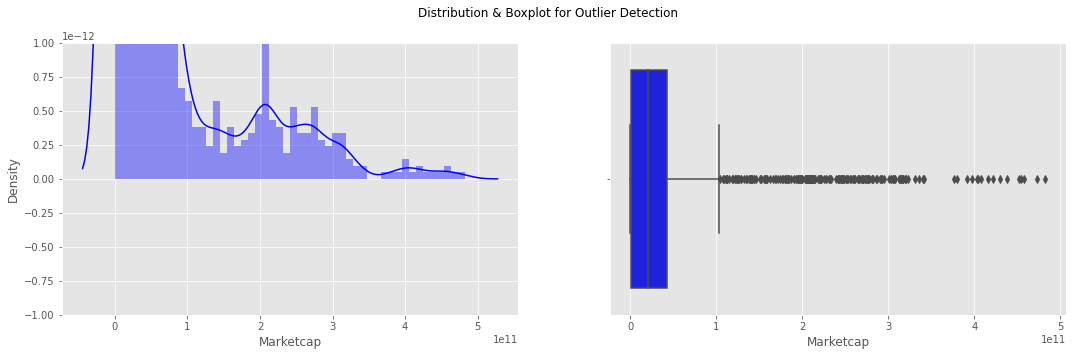

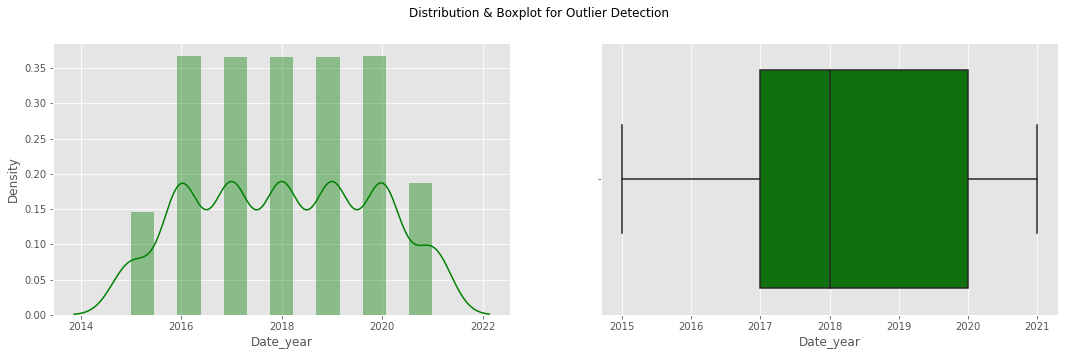

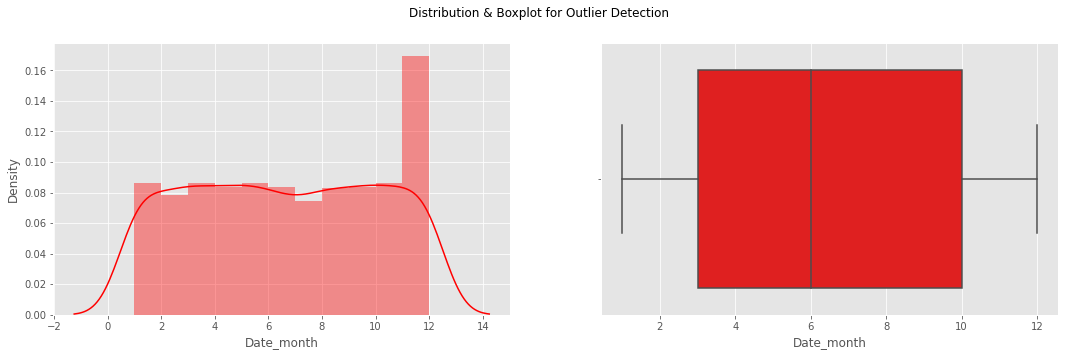

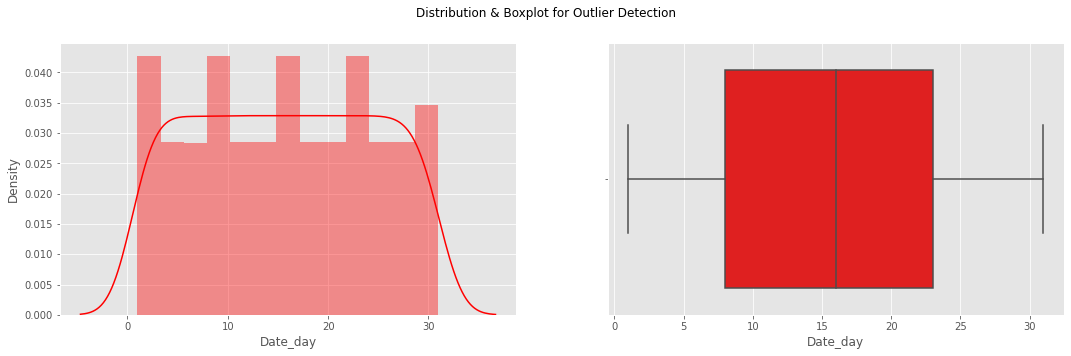

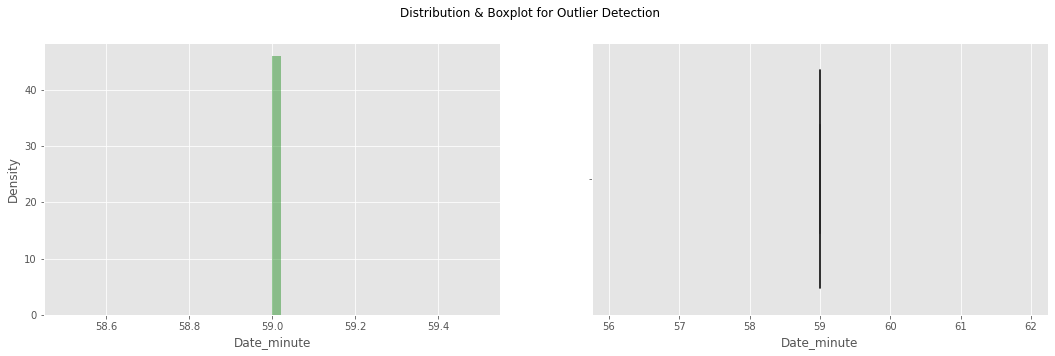

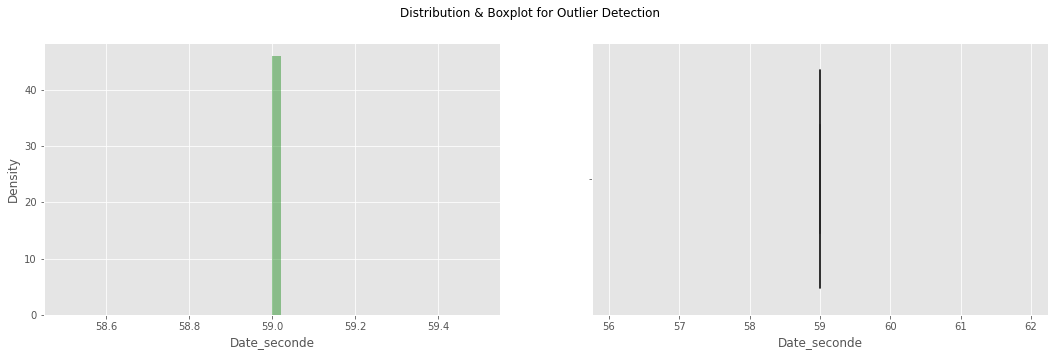

In [ ]:
for i in numeric:
    outlier(data[i])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(encdata)
encdata = pd.DataFrame(minmax_df,columns=encdata.columns)
encdata.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,0.000000,0.0,0.0,0.000531,0.000078,0.000566,0.000076,0.000007,0.000027,0.0,0.636364,0.233333,0.0,0.0,0.0
1,0.000463,0.0,0.0,0.000091,0.000055,0.000066,0.000064,0.000005,0.000021,0.0,0.636364,0.266667,0.0,0.0,0.0
2,0.000926,0.0,0.0,0.000057,0.000057,0.000068,0.000066,0.000004,0.000022,0.0,0.636364,0.300000,0.0,0.0,0.0
3,0.001390,0.0,0.0,0.000149,0.000064,0.000066,0.000152,0.000016,0.000067,0.0,0.636364,0.333333,0.0,0.0,0.0
4,0.001853,0.0,0.0,0.000185,0.000122,0.000150,0.000188,0.000024,0.000086,0.0,0.636364,0.366667,0.0,0.0,0.0


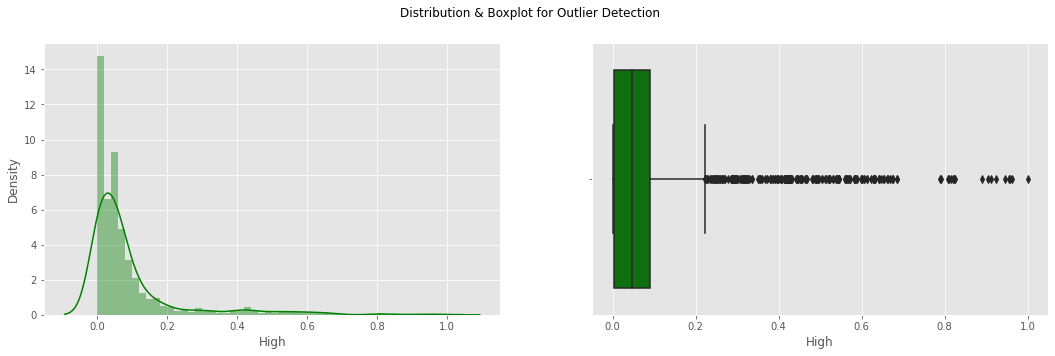

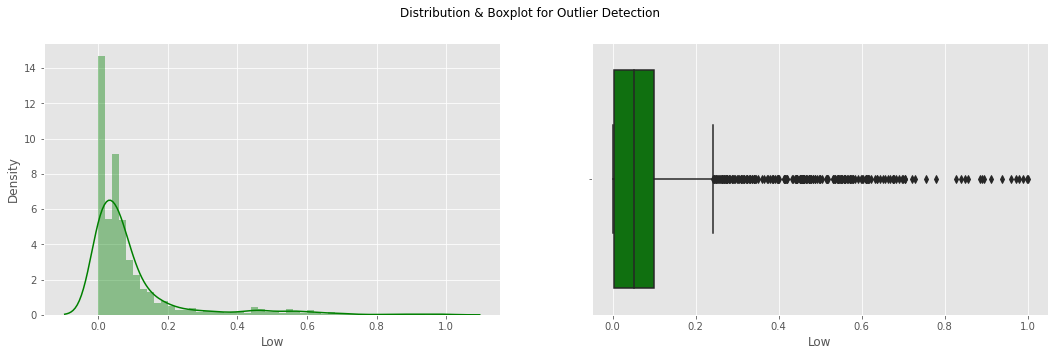

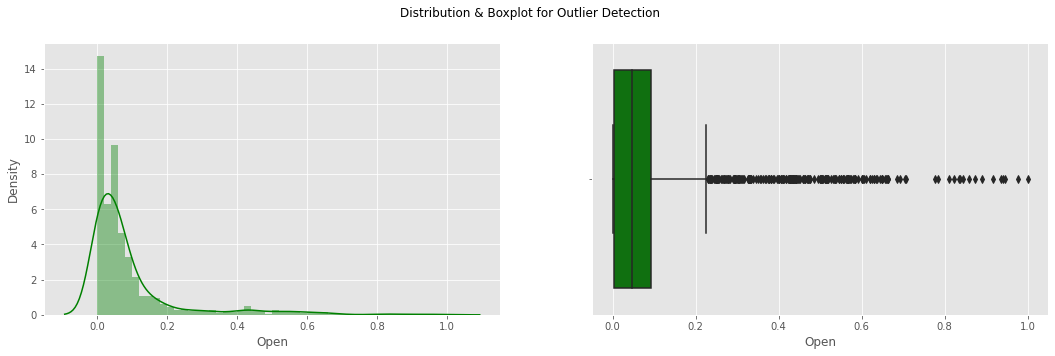

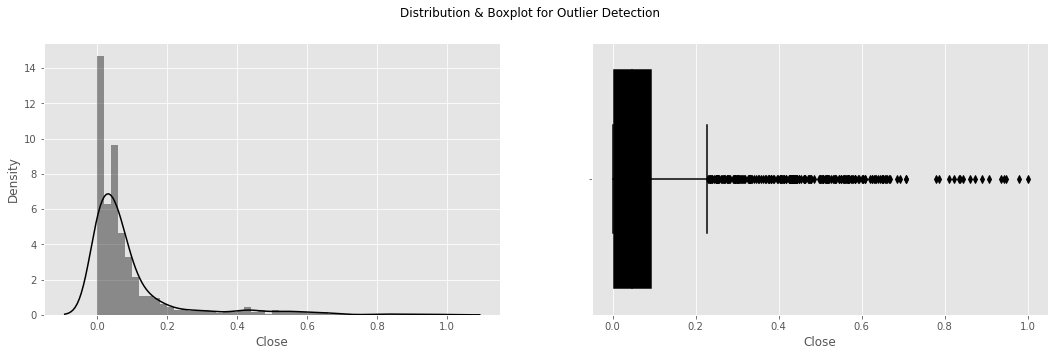

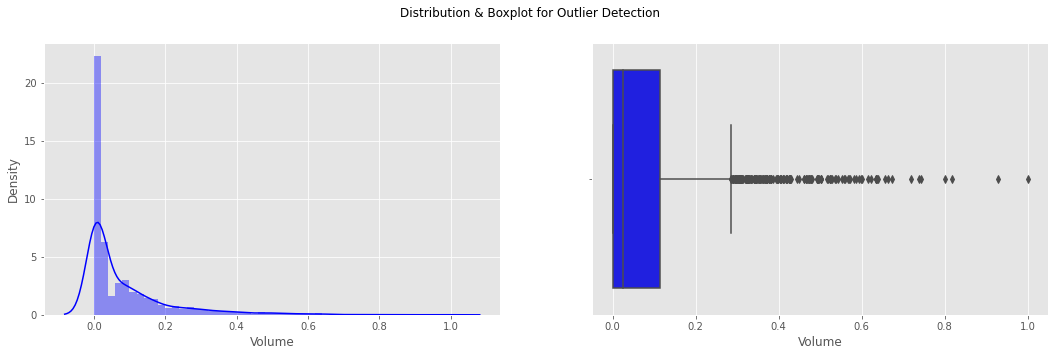

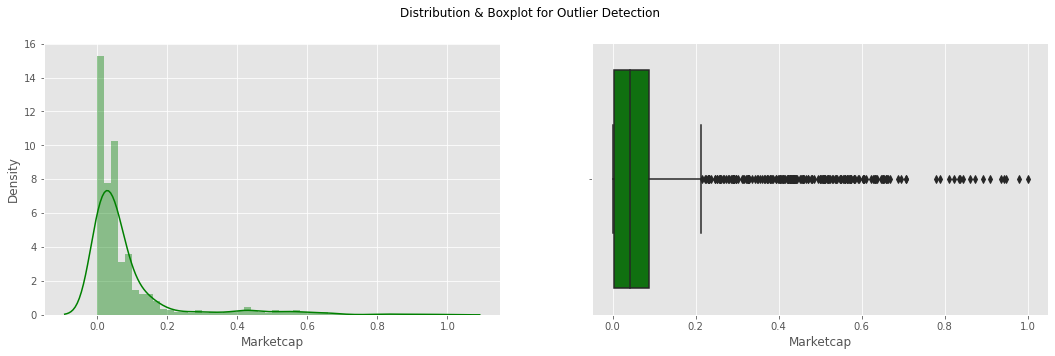

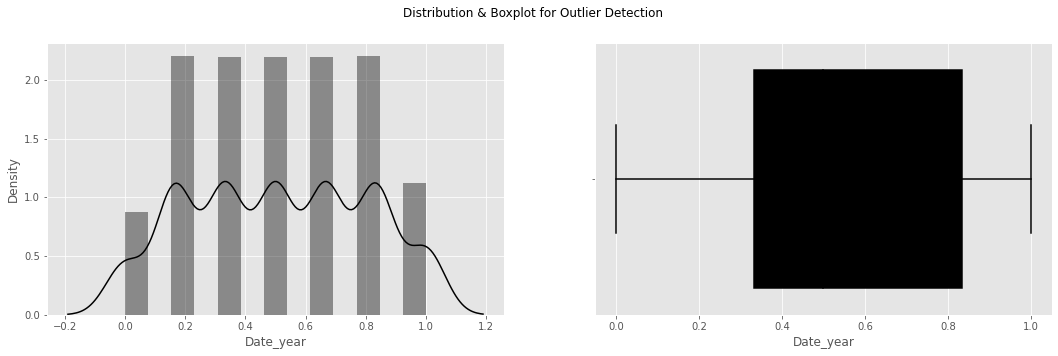

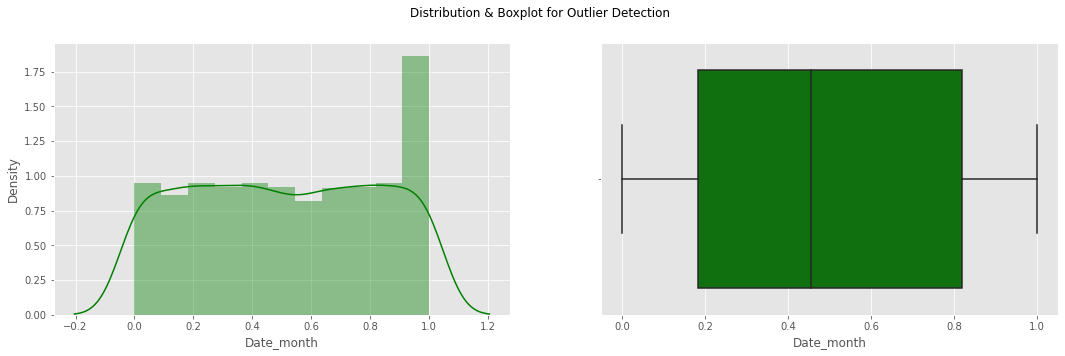

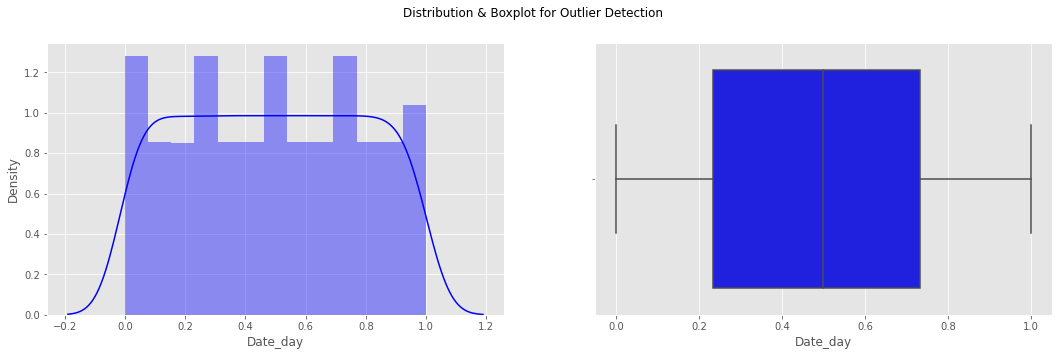

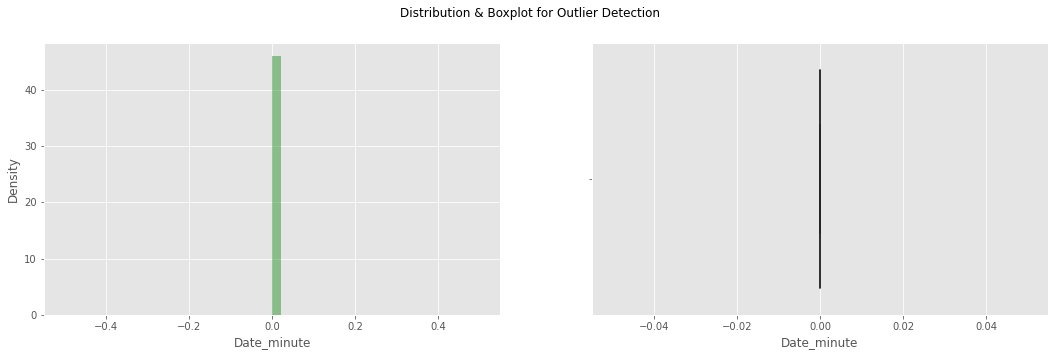

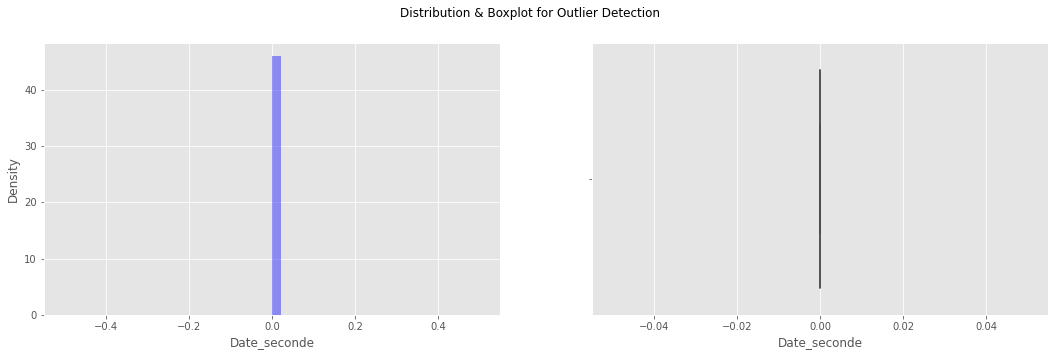

In [ ]:
for i in numeric:
    outlier(encdata[i])

In [ ]:
x= encdata.drop("Marketcap", axis=1)
y=encdata["Marketcap"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23)
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)
ypredtest = reg.predict(xtest)
print(reg.intercept_)

print('Coefficients: ', reg.coef_) 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(xtest, ytest)))
  

-0.29214021892809444
Coefficients:  [-2.84139073e+00 -6.83897383e-14 -5.97299987e-14 -2.53586303e-01
  1.74284312e-01  6.51653929e-02  9.57879319e-01  7.92506287e-02
  2.87283586e+00  4.42793817e-01  3.91522218e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Variance score: 0.9981708834997575


In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, ypredtest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytest, ypredtest))

Mean squared error: 0.00
Coefficient of determination: 1.00


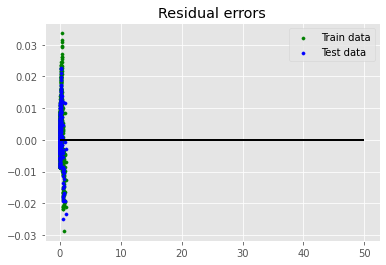

In [ ]:
## plotting residual errors in training data
plt.scatter(reg.predict(xtrain), reg.predict(xtrain) - ytrain,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(xtest), reg.predict(xtest) - ytest,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model0=LinearRegression()
model1=SGDRegressor(random_state=0)
model2=DecisionTreeRegressor()
for model in (model0,model1,model2):
    model.fit(xtrain,ytrain)
    print(model.__class__.__name__, model.score(xtest,ytest))

LinearRegression 0.9981708834997575
SGDRegressor 0.8917545687292878
DecisionTreeRegressor 0.9972316662246868
